# Making a Small Dataset keeping Correlation in Mind
## Coder Name: Janojit Chakraborty
## Coder Registration Number: 21112011

### Objective
- To get basic understanding about Correlation

### Observation on Correlation Values:
- Correlation lies between -1 to +1.
- Different Correlation techniques give us different correlation.
- If two attributes can be represented as,<br>
    <br>
    Attribute1 = Positive Constant x Attribute2<br>
    <br>
   Then their Correlation will be +1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("correlation_Dataset.csv")

df

,A,B,C,D,E,F
0,1,100,100,-719000.000000,-552206.096560,2.00
1,2,200,200,164800.000000,0.583983,23.66
2,3,300,300,-0.761143,-4935.000000,6.00
3,4,400,800,-517900.000000,0.960604,8.00
4,5,500,400,750500.000000,0.189865,10.00
5,6,600,750,-0.249926,-334103.408632,12.00


In [3]:
df_p = df.corr(method='pearson')
df_k = df.corr(method='kendall')
df_s = df.corr(method='spearman')

In [4]:
df_p

,A,B,C,D,E,F
A,1.000000,1.000000,0.803457,0.495757,0.245603,0.079552
B,1.000000,1.000000,0.803457,0.495757,0.245603,0.079552
C,0.803457,0.803457,1.000000,-0.021718,0.207264,-0.006860
D,0.495757,0.495757,-0.021718,1.000000,0.562135,0.473024
E,0.245603,0.245603,0.207264,0.562135,1.000000,0.454963
F,0.079552,0.079552,-0.006860,0.473024,0.454963,1.000000


In [5]:
df_k

,A,B,C,D,E,F
A,1.000000,1.000000,0.733333,0.333333,0.066667,0.466667
B,1.000000,1.000000,0.733333,0.333333,0.066667,0.466667
C,0.733333,0.733333,1.000000,0.066667,0.333333,0.200000
D,0.333333,0.333333,0.066667,1.000000,0.200000,0.600000
E,0.066667,0.066667,0.333333,0.200000,1.000000,0.333333
F,0.466667,0.466667,0.200000,0.600000,0.333333,1.000000


In [6]:
df_s

,A,B,C,D,E,F
A,1.000000,1.000000,0.828571,0.485714,0.142857,0.428571
B,1.000000,1.000000,0.828571,0.485714,0.142857,0.428571
C,0.828571,0.828571,1.000000,0.142857,0.485714,0.257143
D,0.485714,0.485714,0.142857,1.000000,0.314286,0.771429
E,0.142857,0.142857,0.485714,0.314286,1.000000,0.428571
F,0.428571,0.428571,0.257143,0.771429,0.428571,1.000000


In [7]:
feature = ['A','B','C','D','E','F']

In [8]:
method = ['Pearson','Kendall','Spearman']

In [9]:
df2 = pd.DataFrame(columns = ['Feature-1','Feature-2','Method','Corr Value'])

In [10]:
for i in range(len(feature)):
    for j in range(len(feature)):
        for k in range(len(method)):
            newrow = {}
            newrow['Feature-1'] = feature[i]
            newrow['Feature-2'] = feature[j]
            newrow['Method'] = method[k]
            if method[k] == 'Pearson':
                newrow['Corr Value'] = df_p.iat[i,j]
            elif method[k] == 'Kendall':
                newrow['Corr Value'] = df_k.iat[i,j]
            elif method[k] == 'Spearman':
                newrow['Corr Value'] = df_s.iat[i,j]
            df2 = df2.append(newrow,ignore_index=True)

In [11]:
df2

,Feature-1,Feature-2,Method,Corr Value
0,A,A,Pearson,1.000000
1,A,A,Kendall,1.000000
2,A,A,Spearman,1.000000
3,A,B,Pearson,1.000000
4,A,B,Kendall,1.000000
...,...,...,...,...
103,F,E,Kendall,0.333333
104,F,E,Spearman,0.428571
105,F,F,Pearson,1.000000
106,F,F,Kendall,1.000000


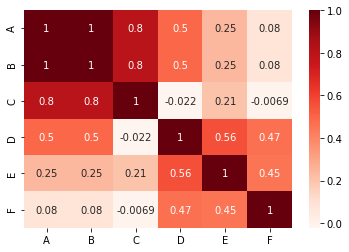

In [12]:
sns.heatmap(df.corr(method='pearson'), annot=True, cmap = 'Reds')
plt.show()

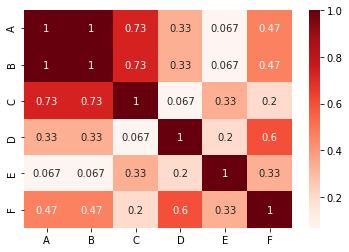

In [13]:
sns.heatmap(df.corr(method='kendall'), annot=True, cmap = 'Reds')
plt.show()

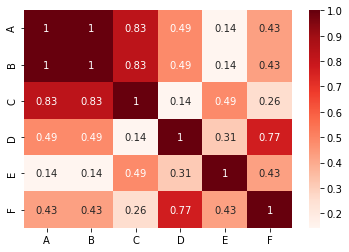

In [14]:
sns.heatmap(df.corr(method='spearman'), annot=True, cmap = 'Reds')
plt.show()

## Data Analysis On This Dataset

In [17]:
df.describe()

,A,B,C,D,E,F
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,3.500000,350.000000,425.000000,-53600.168512,-148540.461790,10.276667
std,1.870829,187.082869,289.395923,521220.266608,238409.480613,7.404544
min,1.000000,100.000000,100.000000,-719000.000000,-552206.096560,2.000000
25%,2.250000,225.000000,225.000000,-388425.190286,-251811.306474,6.500000
50%,3.500000,350.000000,350.000000,-0.505535,-2467.405068,9.000000
75%,4.750000,475.000000,662.500000,123599.937518,0.485454,11.500000
max,6.000000,600.000000,800.000000,750500.000000,0.960604,23.660000


### Box Plot

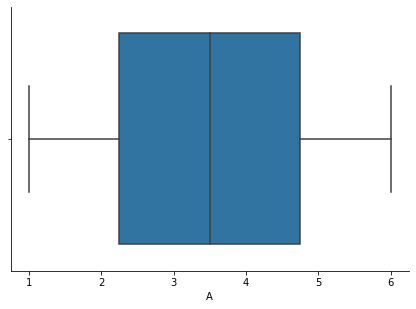

In [21]:
sns.catplot(x="A", kind="box", data=df, height=4.2, aspect=1.4)

**Inference:** As per the box plot the median value of attribute A is in between 3 and 4

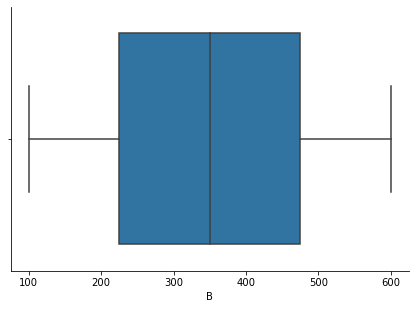

In [22]:
sns.catplot(x="B", kind="box", data=df, height=4.2, aspect=1.4)

**Inference:** As per the box plot the median value of attribute B is in between 300 to 400.

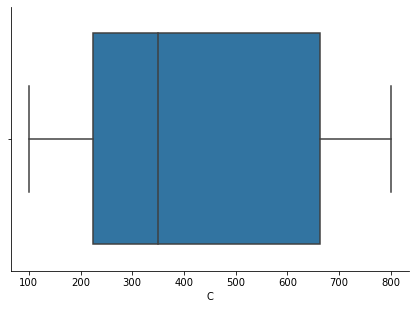

In [23]:
sns.catplot(x="C", kind="box", data=df, height=4.2, aspect=1.4)

**Inference:** As per the box plot the median values of attribute C is also between 300 to 400 but its range is more as compare to others.

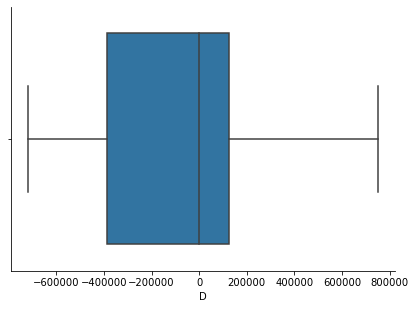

In [24]:
sns.catplot(x="D", kind="box", data=df, height=4.2, aspect=1.4)

**Inference:** The median value for attribute D is tends to 0 but its range is more scattered in negative.

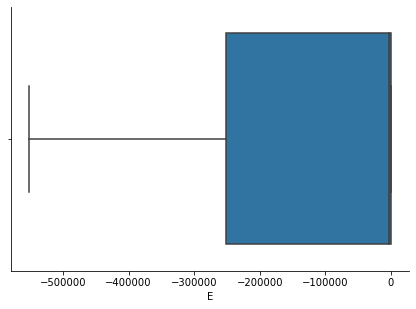

In [25]:
sns.catplot(x="E", kind="box", data=df, height=4.2, aspect=1.4)

**Inference:** The median value for attribute E is tends to 0 and all the are either tends to 0 or negative.

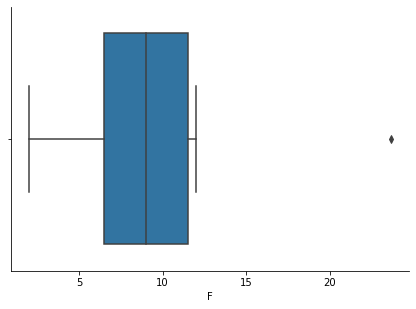

In [26]:
sns.catplot(x="F", kind="box", data=df, height=4.2, aspect=1.4)

**Inference:** The median value of attribute F is near about 8 or 9 and there exist an outlier which is greater than 20.

### Pair Plot

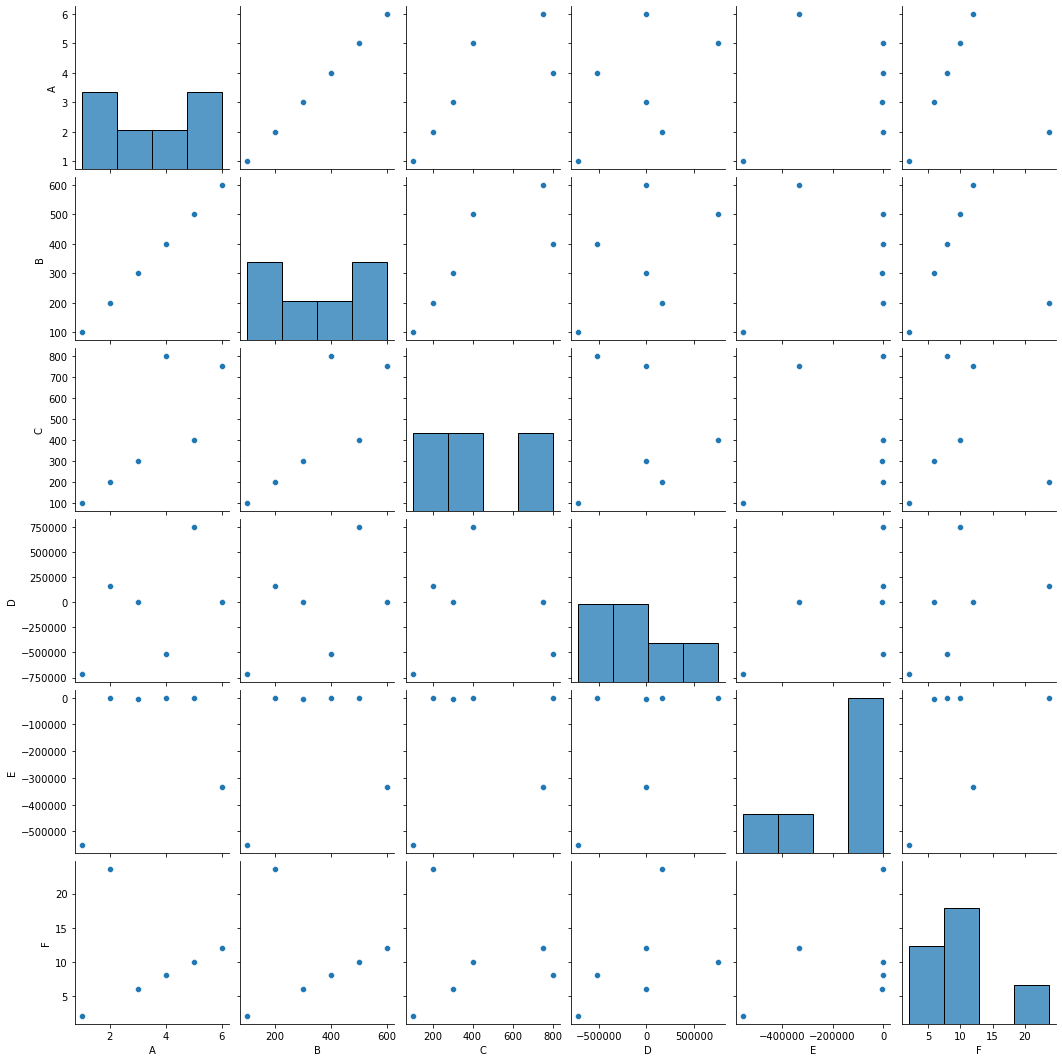

In [15]:
sns.pairplot(data = df)
plt.show()